In [1]:
#Importing the libraries
#Importing pandas

import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 1. Data Cleaning

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [4]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


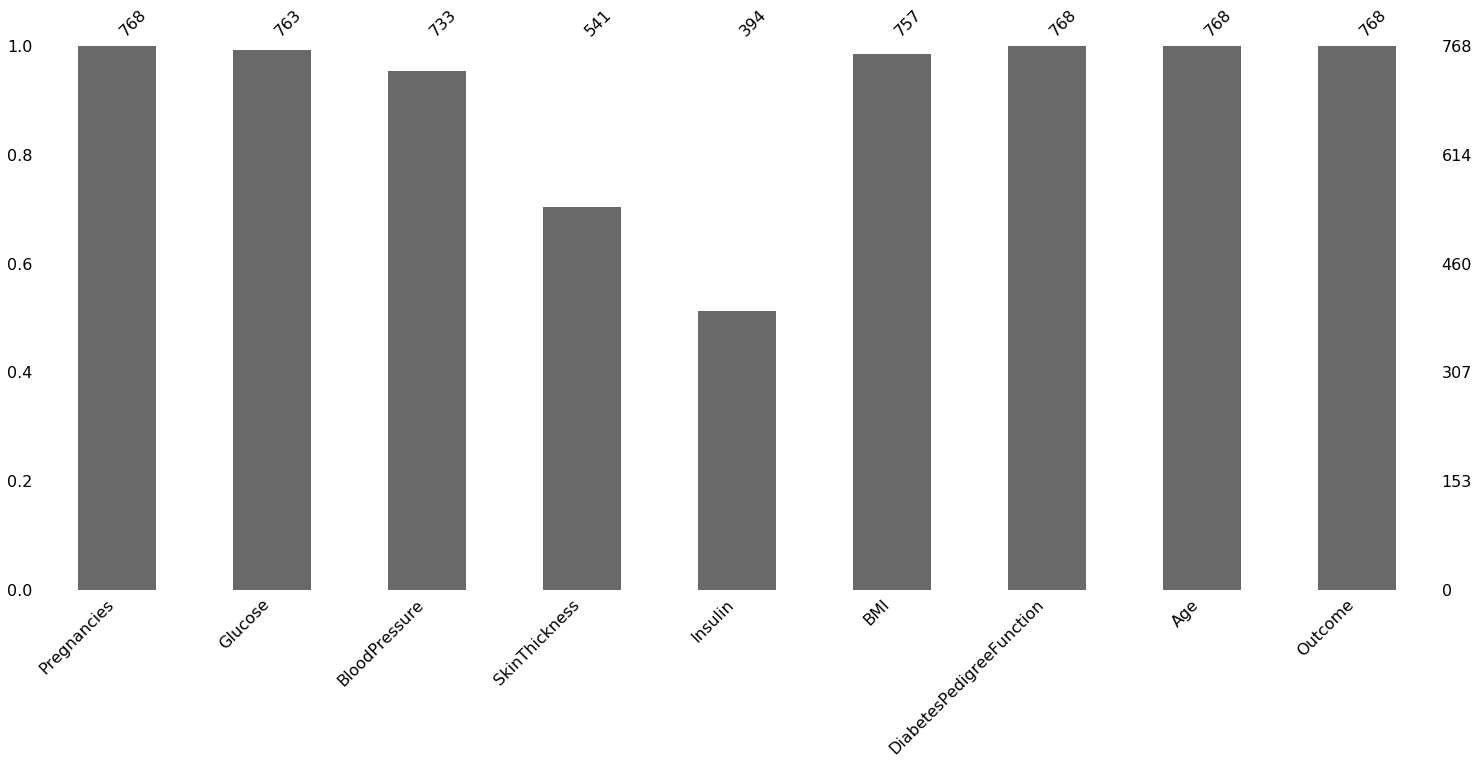

In [7]:
import missingno as msno
p=msno.bar(df)

In [8]:
# Imputation by using the KNN imputation

!pip install impyute

In [9]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [10]:
df_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656910,72.427685,29.157087,155.546401,32.439657,0.471876,33.240885,0.348958
std,3.369578,30.442442,12.102298,8.804400,85.021472,6.877355,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.233609,155.548223,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.844435,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


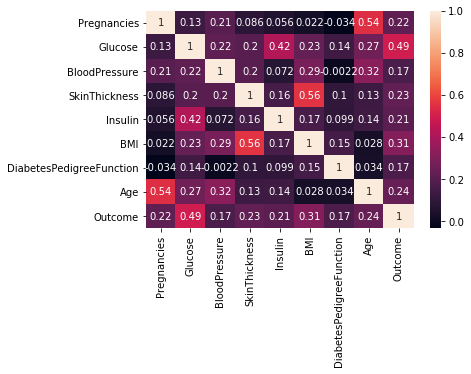

In [14]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

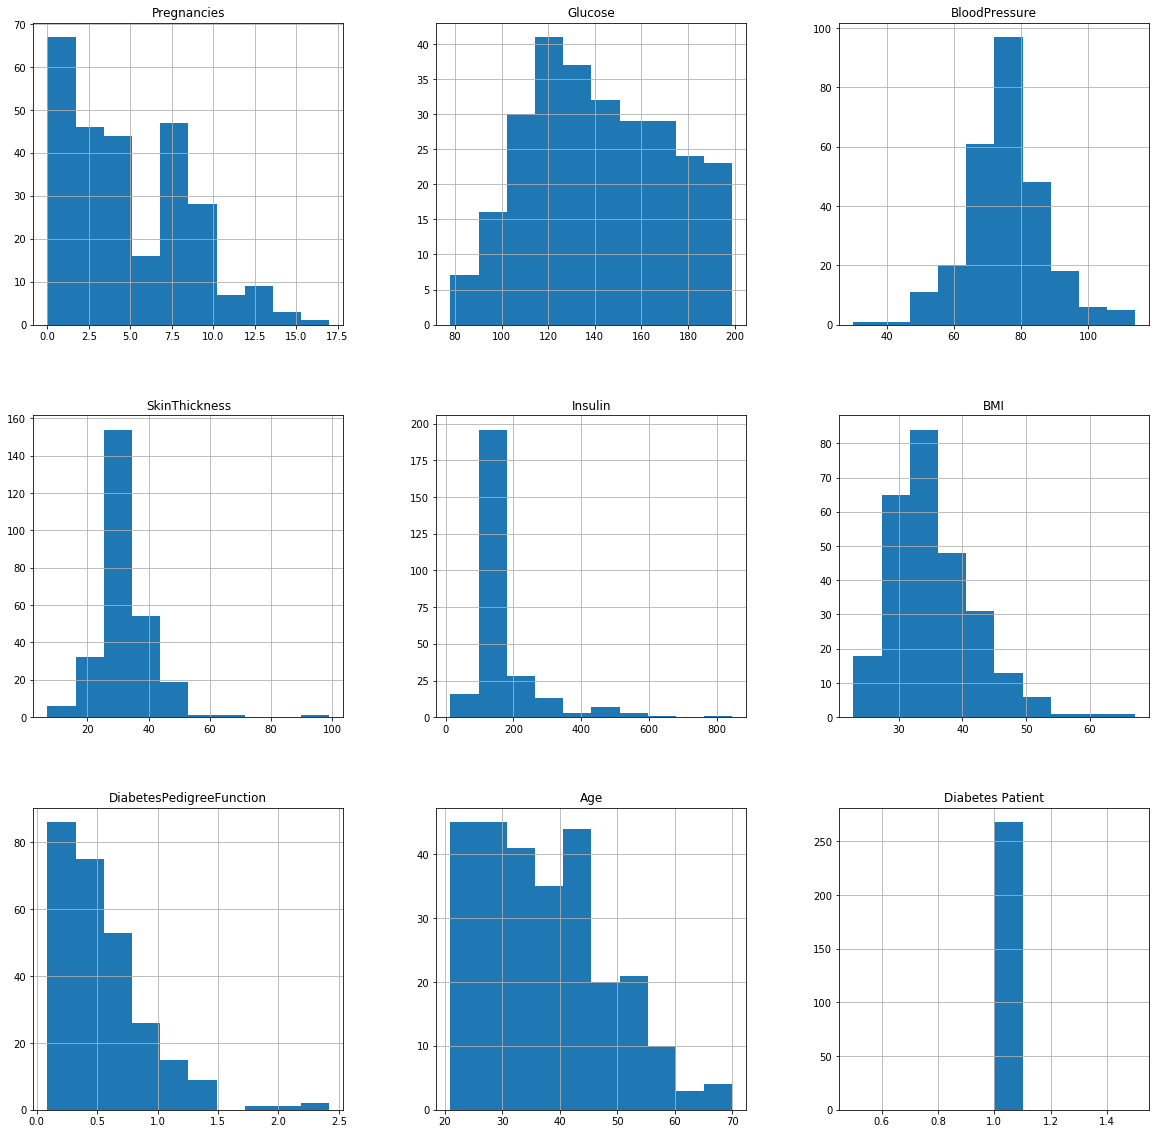

In [15]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [17]:
pip install mlxtend

     |████████████████████████████████| 1.3 MB 19.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


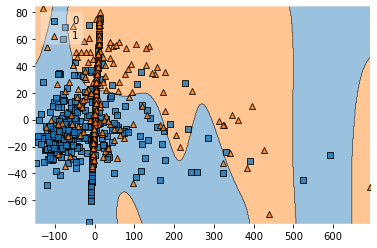

In [19]:

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC

clf = SVC(C=100,gamma=0.0001)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(df)
clf.fit(X_train2, df['Outcome'].astype(int).values)
plot_decision_regions(X_train2, df['Outcome'].astype(int).values, clf=clf, legend=2)

In [20]:
# 2. Data Pre-processing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Outcome', axis = 1))
scaler_features = scaler.transform(df.drop('Outcome', axis = 1))
df_feat = pd.DataFrame(scaler_features, columns = df.columns[:-1])

In [21]:
# appending the outcome feature
df_feat['Outcome'] = df['Outcome'].astype(int)

In [22]:
df = df_feat.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865905,-0.035362,0.664068,-0.000278,0.168829,0.468492,1.425995,1
1,-0.844885,-1.204923,-0.531459,-0.017854,0.000021,-0.849667,-0.365061,-0.190672,0
2,1.233880,2.016365,-0.696824,-0.048445,0.004160,-1.329816,0.604397,-0.105584,1
3,-0.844885,-1.073442,-0.531459,-0.699775,-0.724364,-0.631418,-0.920763,-1.041549,0
4,-1.141852,0.504332,-2.681211,0.664068,0.146571,1.551075,5.484909,-0.020496,1


In [23]:
# 3. Applying classifier

df = df_feat.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865905,-0.035362,0.664068,-0.000278,0.168829,0.468492,1.425995,1
1,-0.844885,-1.204923,-0.531459,-0.017854,0.000021,-0.849667,-0.365061,-0.190672,0
2,1.233880,2.016365,-0.696824,-0.048445,0.004160,-1.329816,0.604397,-0.105584,1
3,-0.844885,-1.073442,-0.531459,-0.699775,-0.724364,-0.631418,-0.920763,-1.041549,0
4,-1.141852,0.504332,-2.681211,0.664068,0.146571,1.551075,5.484909,-0.020496,1


In [33]:
y=df.loc[:,'Outcome']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  df, y, test_size=0.3, random_state=0)

In [35]:
import sklearn


In [36]:
tt = {}
il = []
ac=[]
for  i in range(1,100):
  from sklearn.neighbors import KNeighborsClassifier

  knn = KNeighborsClassifier(n_neighbors=i)

  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)

  from sklearn.metrics import accuracy_score
  il.append(i)
  ac.append( sklearn.metrics.roc_auc_score(y_test,y_pred) )

  tt.update({'K':il})
  tt.update({'ROC_ACC':ac})

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

In [37]:
vv = pd.DataFrame(tt)
vv.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
vv.head(10)

,K,ROC_ACC
0,11,0.943536
1,12,0.943149
2,13,0.943149
3,3,0.937166
4,5,0.937166
5,9,0.930022
6,15,0.929635
7,10,0.929635
8,4,0.926450
9,6,0.926063


In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       157
           1       0.93      0.89      0.91        74

    accuracy                           0.94       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.94      0.94       231



[[152   5]
 [  8  66]]


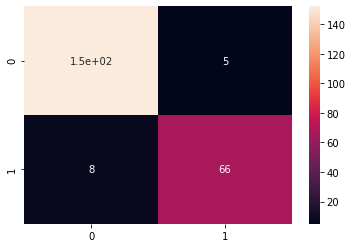

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

Text(0, 0.5, 'True positive rate (Sensitivity)')

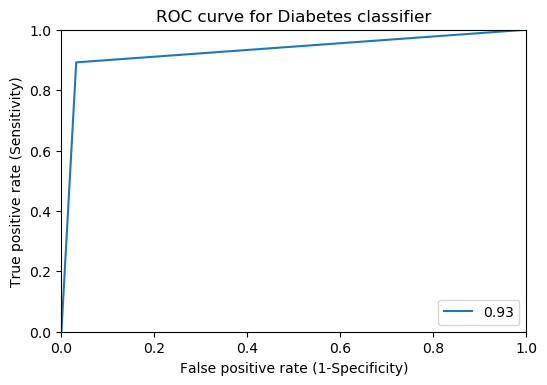

In [41]:
from sklearn.metrics import roc_curve
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr,label = "%.2f" %sklearn.metrics.roc_auc_score(y_test,y_pred))
plt.legend(loc = 'lower right')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Diabetes classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

In [42]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.930022379066965